# Machine learning methods for credit scoring  

Project developed by Gianmaria Carnazzi (August 2019)

In [1]:
%matplotlib inline 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [83]:
df = pd.read_csv('hmeq.csv') 

In [5]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808717,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
numerical_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE','NINQ', 'CLNO', 'DEBTINC'] 

## Data Visualization  

### Univariate Analysis 

0    4771
1    1189
Name: BAD, dtype: int64

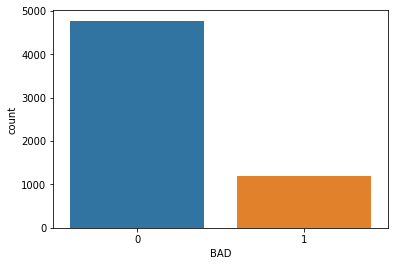

In [8]:
sns.countplot(df['BAD'])
df['BAD'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

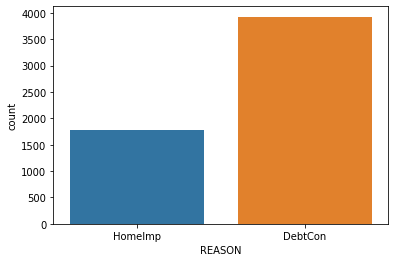

In [9]:
sns.countplot(df['REASON'])
df['REASON'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

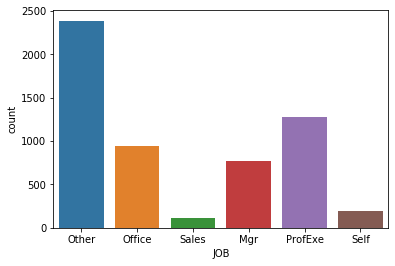

In [10]:
sns.countplot(df['JOB'])
df['JOB'].value_counts()

C:\Users\giamm\Anaconda3.1\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\giamm\Anaconda3.1\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


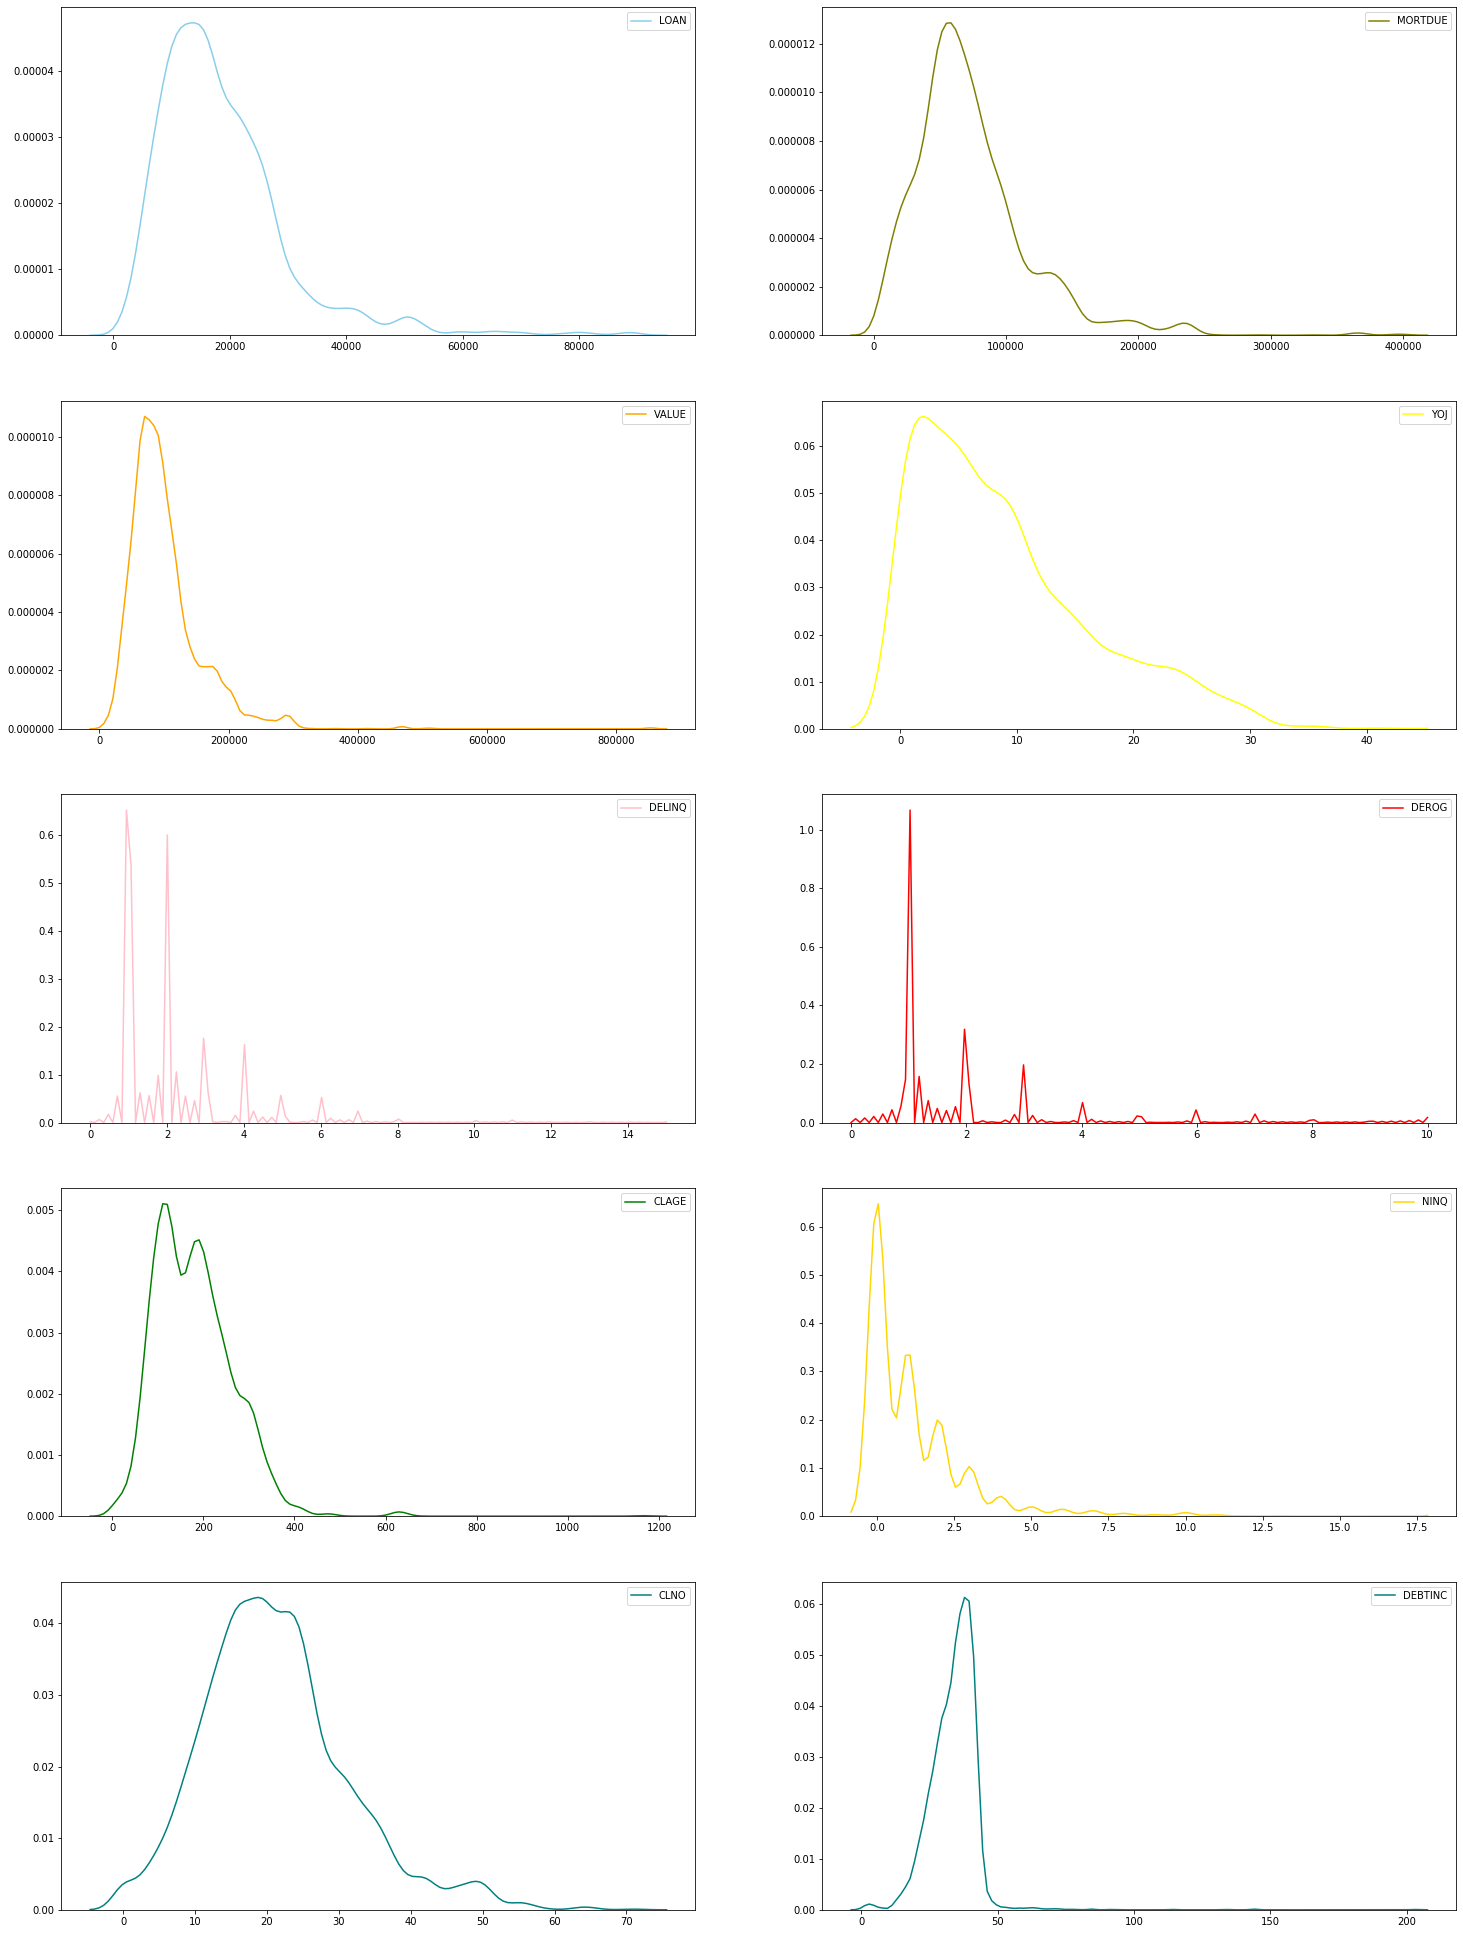

In [11]:
f, axes = plt.subplots(5, 2, figsize=(25,35))
sns.kdeplot(df["LOAN"] , color="skyblue", ax=axes[0, 0])
sns.kdeplot(df["MORTDUE"] , color="olive", ax=axes[0, 1])
sns.kdeplot(df["VALUE"] , color="orange", ax=axes[1, 0])
sns.kdeplot(df["YOJ"] , color="yellow", ax=axes[1, 1])
sns.kdeplot(df["DELINQ"] , color="pink", ax=axes[2, 0])
sns.kdeplot(df["DEROG"] , color="red", ax=axes[2, 1])
sns.kdeplot(df["CLAGE"] , color="green", ax=axes[3, 0])
sns.kdeplot(df["NINQ"] , color="gold", ax=axes[3, 1])
sns.kdeplot(df["CLNO"] , color="teal", ax=axes[4, 0])
sns.kdeplot(df["DEBTINC"] , color="teal", ax=axes[4, 1])

In [12]:
df[numerical_columns].describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


### Bivariate Analysis 

In the bivariate analysis we highlight the correlation between some of the variables that can be considered the most relevant. The dependence between variables plays a major role for the predictive part of the analysis therefore it is a crucial step of the visualization process. 

In [13]:
from scipy import stats
from scipy.stats import chi2_contingency

In [14]:
def chi_squared_test(tab):
    
    chi2, p, dof, ex = chi2_contingency(tab)
    print("chi2 = ", chi2)
    print("p-val = ", p)
    print("degree of freedom = ",dof)
    print("Expected:")
    
    return pd.DataFrame(ex) 
    

In [15]:
def v_cramer(tab):

    chi2 = chi2_contingency(tab)[0]
    n = sum(tab.sum()) 
    phi2 = chi2/n
    r,k = tab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

BAD,0,1
REASON,,
DebtCon,0.810336,0.189664
HomeImp,0.777528,0.222472


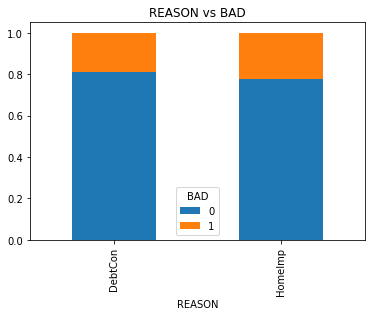

In [16]:
tab = pd.crosstab(df['REASON'],df['BAD'])
tab1 = tab.div(tab.sum(1).astype(float), axis=0)
tab1.plot(kind="bar", stacked=True, title='REASON vs BAD')
tab1

In [17]:
tab =  pd.crosstab(df['BAD'],df['REASON'])
chi_squared_test(tab)

chi2 =  8.039751291499368
p-val =  0.004576181950707231
degree of freedom =  1
Expected:


,0,1
0,3142.812894,1424.187106
1,785.187106,355.812894


In [18]:
v_cramer(tab) 

0.03512119816299411

BAD,0,1
JOB,,
Mgr,0.766623,0.233377
Office,0.868143,0.131857
Other,0.768007,0.231993
ProfExe,0.833856,0.166144
Sales,0.651376,0.348624
Self,0.699482,0.300518


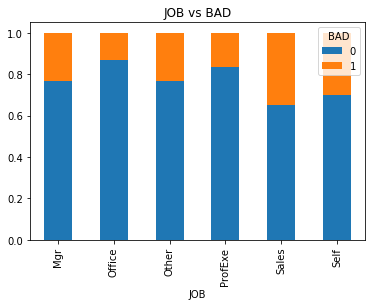

In [19]:
tab=pd.crosstab(df['JOB'],df['BAD'])
tab1 = tab.div(tab.sum(1).astype(float), axis=0)
tab1.plot(kind="bar", stacked=True, title='JOB vs BAD')
tab1

In [20]:
tab =  pd.crosstab(df['BAD'],df['JOB'])
chi_squared_test(tab)

chi2 =  81.93248953692775
p-val =  3.3066762328584986e-16
degree of freedom =  5
Expected:


,0,1,2,3,4,5
0,609.576659,753.427214,1897.873614,1014.106671,86.628234,153.387608
1,157.423341,194.572786,490.126386,261.893329,22.371766,39.612392


In [21]:
v_cramer(tab)

0.11637997174732402

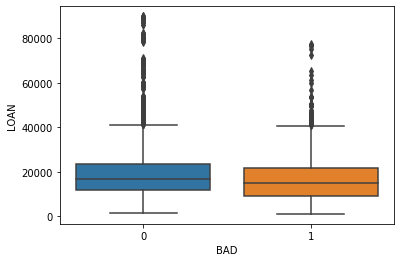

In [22]:
sns.boxplot(x='BAD', y='LOAN', data = df)

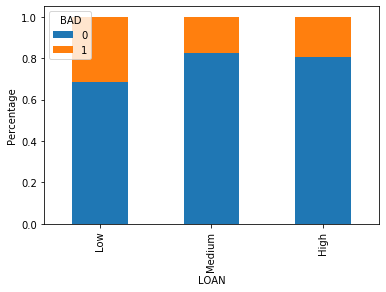

In [23]:
dfWithBin = df.copy()
bins=[0,9000,30000,90000] 
group=['Low','Medium','High'] 
dfWithBin['LOAN_bin']=pd.cut(df['LOAN'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['LOAN_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LOAN')
P= plt.ylabel('Percentage')

In [26]:
stats.ttest_ind(df['BAD'].values, df['LOAN'].values)

Ttest_indResult(statistic=-128.17681544162232, pvalue=0.0)

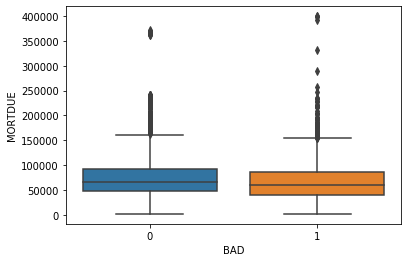

In [27]:
sns.boxplot(x = 'BAD', y='MORTDUE', data = df)

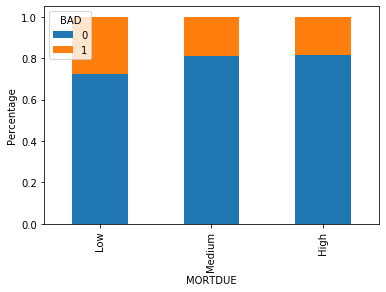

In [28]:
bins=[0,30000,110000,400000] 
group=['Low','Medium','High'] 
dfWithBin['MORTDUE_bin']=pd.cut(dfWithBin['MORTDUE'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['MORTDUE_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('MORTDUE')
P= plt.ylabel('Percentage')

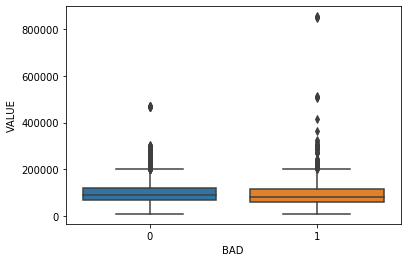

In [29]:
sns.boxplot(x = 'BAD', y='VALUE', data = df)

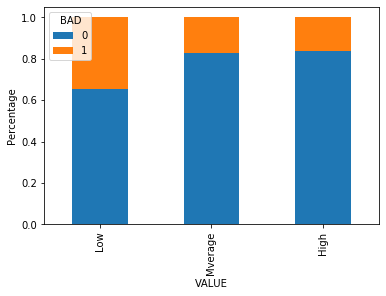

In [30]:
bins=[0,44000,160000,860000] 
group=['Low','Mverage','High'] 
dfWithBin['VALUE_bin']=pd.cut(dfWithBin['VALUE'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['VALUE_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('VALUE')
P= plt.ylabel('Percentage')

DELINQ,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,13.0,15.0
BAD,,,,,,,,,,,,,,
0,3596,432,138,58,32,7,0,0,0,0,0,0,0,0
1,583,222,112,71,46,31,27,13,5,2,2,1,1,1


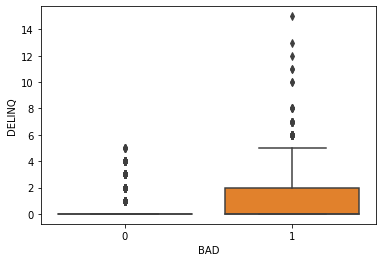

In [31]:
sns.boxplot(x = 'BAD', y='DELINQ', data = df) 
tab = pd.crosstab(df['BAD'], df['DELINQ'])
tab

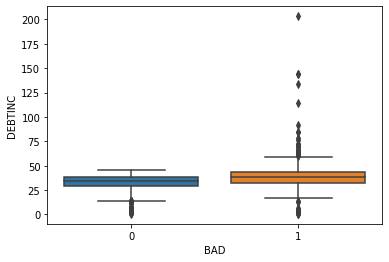

In [32]:
sns.boxplot(x = 'BAD', y='DEBTINC', data = df)

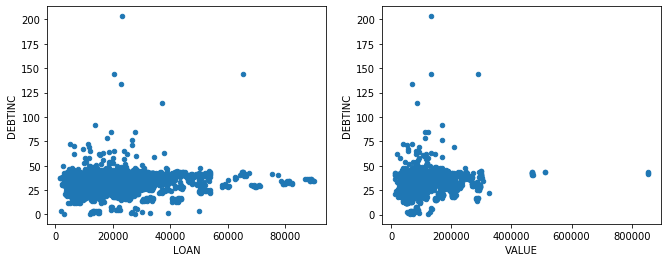

In [33]:
f, axes = plt.subplots(1, 2, figsize=(11,4))
df.plot.scatter(x='LOAN', y='DEBTINC', ax=axes[0])
df.plot.scatter(x='VALUE', y='DEBTINC', ax=axes[1]) 

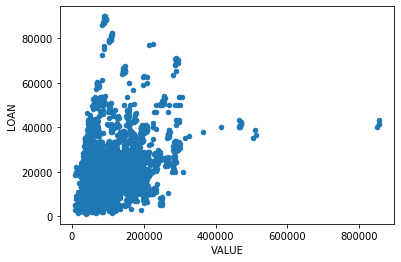

In [34]:
df.plot.scatter(x='VALUE', y='LOAN')

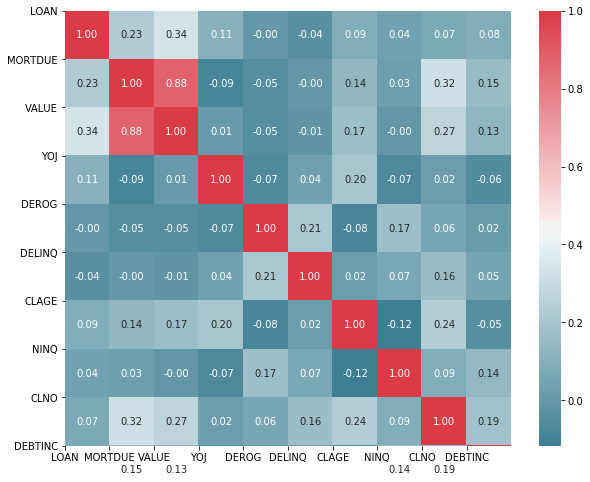

In [35]:
df3 = df.copy()
df3 = df3.drop('BAD', axis=1)
corr = df3.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show() 

Correlation can be useful for feature selection 

## Missing values 

Handling missing data is a crucial phase in the analysis. There are some methods to tackle the problem: listwise and pairwise deletion, substitution with meaningful values, predictive modeling. We start by taking an overview of the problem, looking at what you don't see can give you information about what you see, you can find out interesting patterns. Furthermore we can check the type of randomness of the missing values themselves.  

In [39]:
import missingno as miss

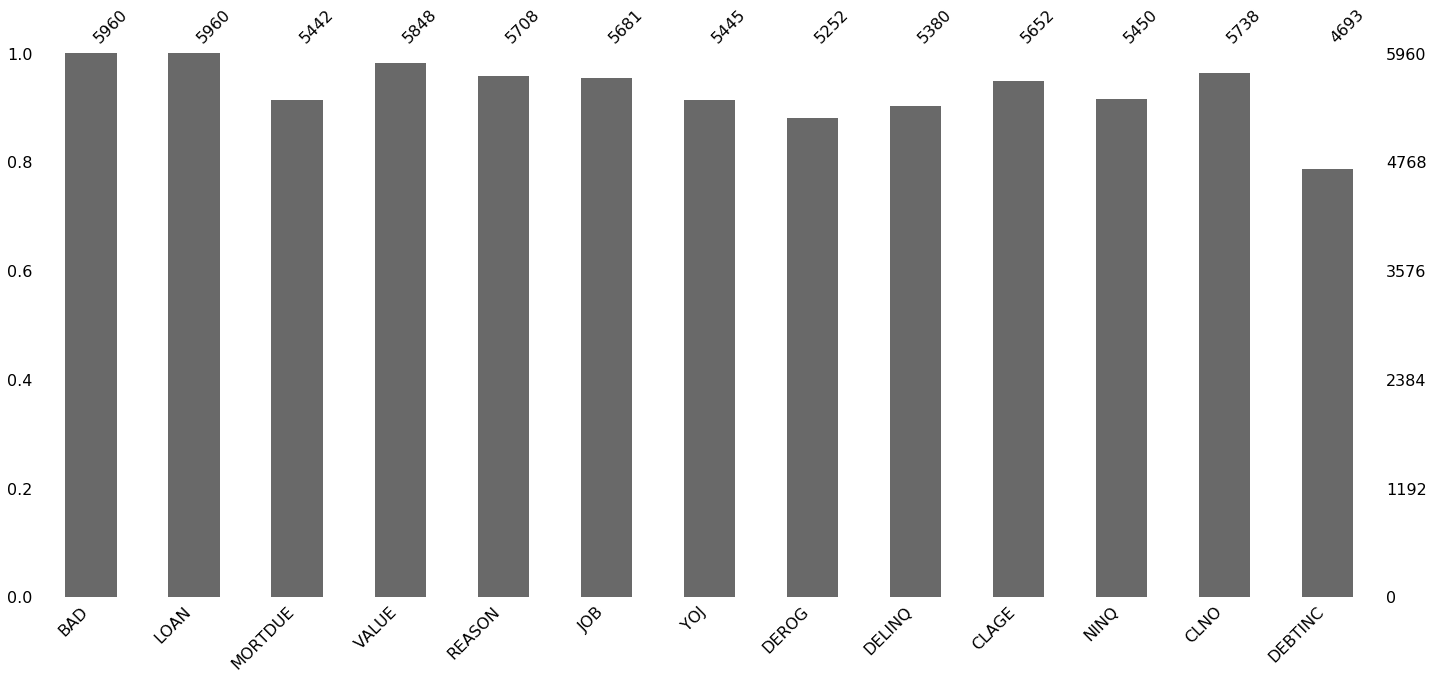

In [40]:
miss.bar(df)

DEBTINC is the feature with more missing values

The graph below provides another point of view of the missing values.
Nullity correlation ranges from -1 (if one variable appears and the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).
Variables that are always full or always empty have no meaningful correlation, and so are removed from the visualization.
Entries marked < 1 or > -1 have a correlation that is close to be exactly positive or negative, but is still not quite perfect. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed. Red cells mean negative correlation.
From our heatmap it's clear that there's no high correlation between the majority of the features from this standpoint, the only significant relationships are between DELINQ and DEROG, NINQ and DELINQ, CLNO and CLAGE. They make sense because those features are all related to credit lines and so if the dataset lacks values in one of them it's probable that it will lack also in others realted to the same field. 
The heatmap works great for picking out data completeness relationships between variable pairs, for defining the kind of randomness between categories but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets.

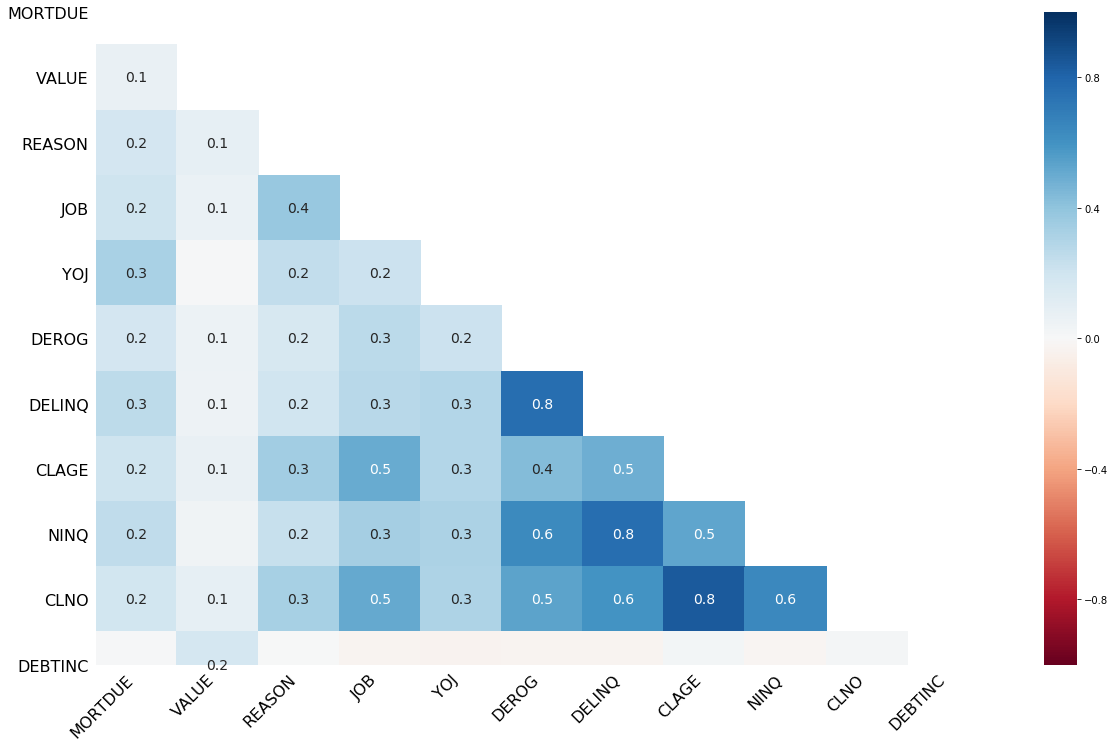

In [41]:
miss.heatmap(df)

The dendrogram reveals correlations deeper than the pairwise ones of the heatmap. It uses a hierarchical clustering algorithm (from scipy.cluster.hierarchy) to bin variables against one another by their nullity correlation, measured in terms of binary distance. At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero. Cluster leaves which linked together at a distance of zero fully predict one another's presence: one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. We notice the same correlations of the heatmap with others less strong that can be considered anyway.

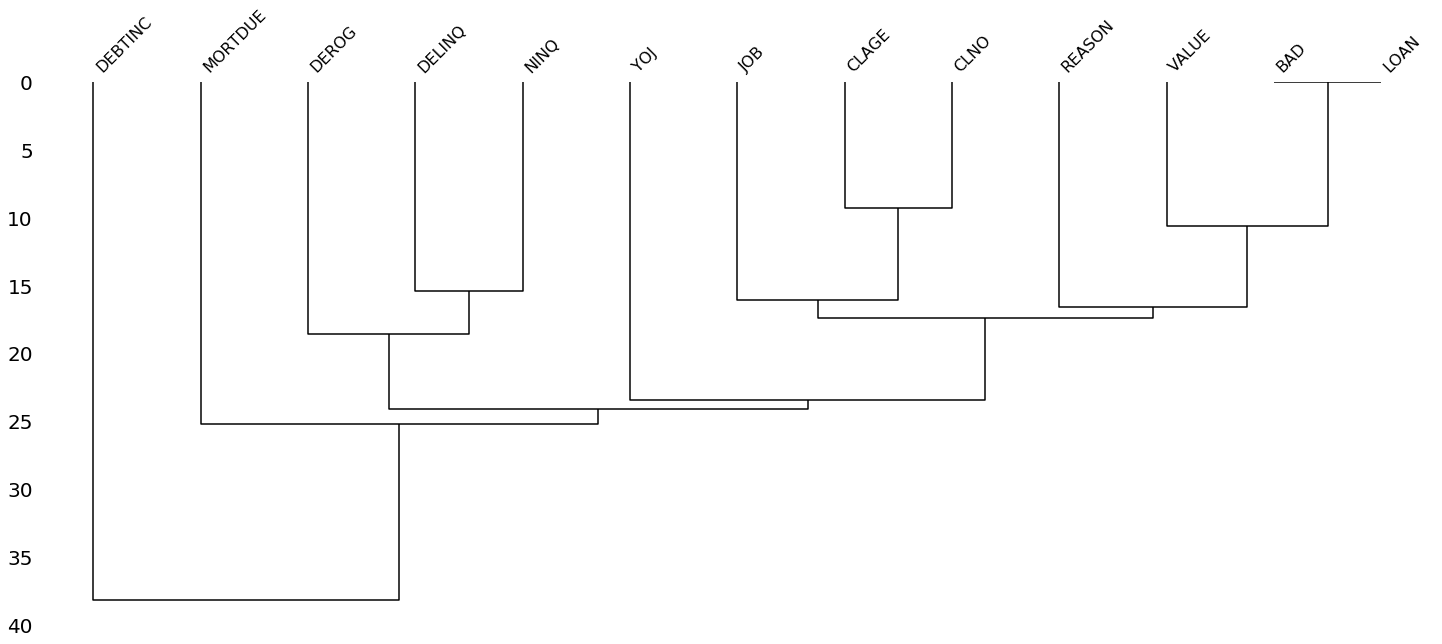

In [42]:
miss.dendrogram(df)

In [43]:
def miss_val_tab(df):
    
    numb = df.isnull().sum()
    perc = 100 * df.isnull().sum() / len(df)
    tab = pd.concat([numb, perc], axis=1)
    fintab = tab.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    fintab = fintab[fintab.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    return fintab 

In [44]:
miss_val_tab(df) 

,Missing Values,% of Total Values
DEBTINC,1267,21.3
DEROG,708,11.9
DELINQ,580,9.7
MORTDUE,518,8.7
YOJ,515,8.6
NINQ,510,8.6
CLAGE,308,5.2
JOB,279,4.7
REASON,252,4.2
CLNO,222,3.7


In [7]:
dftest = df.dropna(axis=0, how='any', inplace=True)
dftest.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 13 columns):
BAD        3364 non-null int64
LOAN       3364 non-null int64
MORTDUE    3364 non-null float64
VALUE      3364 non-null float64
REASON     3364 non-null object
JOB        3364 non-null object
YOJ        3364 non-null float64
DEROG      3364 non-null float64
DELINQ     3364 non-null float64
CLAGE      3364 non-null float64
NINQ       3364 non-null float64
CLNO       3364 non-null float64
DEBTINC    3364 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 367.9+ KB


It seems we lost lot of observations, this is not good for the generalization of the model, we could consider to replace them by imputation or easier substitutions with meaningful values like mean, median and mode. Anyway we delete observations with DEBTINC as missing value given the high percentage involved.For DEBTINC we could think about a predictive model after transforming it in a categorical variable, but given the number of observations, not that big, probably it's not a good idea to build a predictive model for imputation. We first check the result with these methods. 

In [84]:
df1 = df.copy()
df.dropna(subset=['DEBTINC'], how='any', inplace=True) 

In [48]:
miss_val_tab(df) 

,Missing Values,% of Total Values
DEROG,578,12.3
DELINQ,476,10.1
YOJ,429,9.1
NINQ,416,8.9
MORTDUE,402,8.6
JOB,234,5.0
CLAGE,227,4.8
REASON,196,4.2
CLNO,164,3.5
VALUE,31,0.7


In [85]:
# Categorical variables
# Replacement using mode

df["REASON"].fillna(value = "DebtCon",inplace = True)
df["JOB"].fillna(value = "Other",inplace = True)
df1["REASON"].fillna(value = "DebtCon",inplace = True)
df1["JOB"].fillna(value = "Other",inplace = True)

In [86]:
# Even though these are numerical features they have few different values and they are integers for sure. Therefore,
# given that zero is dominant, we use it to replace NAN values
df["DEROG"].fillna(value=0,inplace=True)
df["DELINQ"].fillna(value=0,inplace=True)
df['NINQ'].fillna(value=0, inplace=True)
df1["DEROG"].fillna(value=0,inplace=True)
df1["DELINQ"].fillna(value=0,inplace=True)
df1['NINQ'].fillna(value=0, inplace=True)
# For YOJ and CLNO, given that there's no really dominant value, we drop the observations 
df.dropna(subset=['YOJ'], how='any', inplace=True)
df.dropna(subset=['CLNO'], how='any', inplace=True) 
df1.dropna(subset=['YOJ'], how='any', inplace=True)
df1.dropna(subset=['CLNO'], how='any', inplace=True) 

In [87]:
# For the remaining numerical categories we use the median instead of the mean to better preserve the distribution 
df.fillna(value=df.median(),inplace=True)
df1['DEBTINC'].fillna(value=df1['DEBTINC'].mean(), inplace=True)
df1.fillna(value=df1.median(), inplace=True)
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4196 entries, 5 to 5959
Data columns (total 13 columns):
BAD        4196 non-null int64
LOAN       4196 non-null int64
MORTDUE    4196 non-null float64
VALUE      4196 non-null float64
REASON     4196 non-null object
JOB        4196 non-null object
YOJ        4196 non-null float64
DEROG      4196 non-null float64
DELINQ     4196 non-null float64
CLAGE      4196 non-null float64
NINQ       4196 non-null float64
CLNO       4196 non-null float64
DEBTINC    4196 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 458.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5340 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5340 non-null int64
LOAN       5340 non-null int64
MORTDUE    5340 non-null float64
VALUE      5340 non-null float64
REASON     5340 non-null object
JOB        5340 non-null object
YOJ        5340 non-null float64
DEROG      5340 non-null float64
DELINQ     5340 non-null float64
CLAGE   

## Preprocessing 

Now we prepare data for the predictive phase. First we transfrom categorical variables using dummies. Then we could consider to transform other variables in order to reduce the outliers that can harm the prediction.

In [88]:
df = pd.get_dummies(df, columns=['REASON','JOB'])
df1 = pd.get_dummies(df1, columns=['REASON','JOB'])

In [53]:
df['DELINQ'].value_counts()

0.0     3501
1.0      407
2.0      154
3.0       67
4.0       38
5.0       13
7.0        7
6.0        7
10.0       1
8.0        1
Name: DELINQ, dtype: int64

In [54]:
df['DEROG'].value_counts()

0.0     3820
1.0      249
2.0       84
3.0       25
4.0        8
6.0        3
7.0        2
5.0        2
9.0        1
10.0       1
8.0        1
Name: DEROG, dtype: int64

In [55]:
df['NINQ'].value_counts()

0.0     2157
1.0      988
2.0      541
3.0      272
4.0       98
5.0       42
6.0       27
10.0      23
7.0       22
8.0       12
9.0        8
11.0       5
13.0       1
Name: NINQ, dtype: int64

In [56]:
df['CLNO'].value_counts()

16.0    255
19.0    205
24.0    204
23.0    199
21.0    179
15.0    169
20.0    162
25.0    162
22.0    157
18.0    157
17.0    153
26.0    152
13.0    149
14.0    140
12.0    127
11.0    114
27.0    105
10.0     94
29.0     92
30.0     91
31.0     86
32.0     86
9.0      86
28.0     71
8.0      69
34.0     67
35.0     60
36.0     55
7.0      47
33.0     45
37.0     42
6.0      38
42.0     32
5.0      31
4.0      31
38.0     28
49.0     27
0.0      26
50.0     22
3.0      22
47.0     21
41.0     20
46.0     16
43.0     15
55.0     13
51.0     12
40.0     11
39.0     11
45.0      9
48.0      6
2.0       5
56.0      4
1.0       3
64.0      3
52.0      3
44.0      3
65.0      1
63.0      1
58.0      1
71.0      1
Name: CLNO, dtype: int64

In [57]:
df['YOJ'].value_counts()

0.0     364
1.0     295
2.0     277
4.0     265
5.0     261
6.0     252
3.0     239
9.0     234
10.0    212
7.0     198
8.0     196
11.0    142
13.0    133
12.0    111
14.0    108
15.0    100
16.0     95
19.0     72
17.0     67
23.0     66
20.0     63
24.0     61
18.0     59
21.0     58
22.0     53
25.0     45
26.0     37
27.0     33
28.0     29
29.0     25
30.0     24
31.0     10
35.0      5
36.0      4
34.0      1
32.0      1
41.0      1
Name: YOJ, dtype: int64

We look at the variables with smaller values and few different values. In general it seems that the higher is the value of the variable the smaller the number of observations with that value but there are exceptions. For example in CLNO we have values equal to 2 and 1 with few observations. Furthermore there are significant differences in distribution. Therefore we focus just on DELINQ, DEROG and NINQ where the values and the number of observations seem to strictly follow the above-mentioned "rule", and above all the distribution is much more skewed.

In [89]:
df['DUMM_DEROG'] = (df['DEROG']>=1)*1
df['DUMM_DELINQ'] = (df['DELINQ']>=1)*1
df['DUMM_NINQ'] = (df['NINQ']>=1)*1
df = df.drop(['DEROG','NINQ','DELINQ'], axis=1)
df1['DUMM_DEROG'] = (df1['DEROG']>=1)*1
df1['DUMM_DELINQ'] = (df1['DELINQ']>=1)*1
df1['DUMM_NINQ'] = (df1['NINQ']>=1)*1
df1 = df1.drop(['DEROG','NINQ','DELINQ'], axis=1)
df

,BAD,LOAN,MORTDUE,VALUE,YOJ,CLAGE,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,DUMM_DEROG,DUMM_DELINQ,DUMM_NINQ
5,1,1700,30548.0,40320.0,9.0,101.466002,8.0,37.113614,0,1,0,0,1,0,0,0,0,0,1
7,1,1800,28502.0,43034.0,11.0,88.766030,8.0,36.884894,0,1,0,0,1,0,0,0,0,0,0
19,0,2300,102370.0,120953.0,2.0,90.992533,13.0,31.588503,0,1,0,1,0,0,0,0,0,0,0
25,1,2400,34863.0,47471.0,12.0,70.491080,21.0,38.263601,0,1,1,0,0,0,0,0,0,0,1
26,0,2400,98449.0,117195.0,4.0,93.811775,13.0,29.681827,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,221.808717,16.0,36.112347,1,0,0,0,1,0,0,0,0,0,0
5956,0,89000,54576.0,92937.0,16.0,208.692070,15.0,35.859971,1,0,0,0,1,0,0,0,0,0,0
5957,0,89200,54045.0,92924.0,15.0,212.279697,15.0,35.556590,1,0,0,0,1,0,0,0,0,0,0
5958,0,89800,50370.0,91861.0,14.0,213.892709,16.0,34.340882,1,0,0,0,1,0,0,0,0,0,0


We create dummies for those three features dividing into values smaller than 0 and bigger than or equal to 1

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4196 entries, 5 to 5959
Data columns (total 19 columns):
BAD               4196 non-null int64
LOAN              4196 non-null int64
MORTDUE           4196 non-null float64
VALUE             4196 non-null float64
YOJ               4196 non-null float64
CLAGE             4196 non-null float64
CLNO              4196 non-null float64
DEBTINC           4196 non-null float64
REASON_DebtCon    4196 non-null uint8
REASON_HomeImp    4196 non-null uint8
JOB_Mgr           4196 non-null uint8
JOB_Office        4196 non-null uint8
JOB_Other         4196 non-null uint8
JOB_ProfExe       4196 non-null uint8
JOB_Sales         4196 non-null uint8
JOB_Self          4196 non-null uint8
DUMM_DEROG        4196 non-null int32
DUMM_DELINQ       4196 non-null int32
DUMM_NINQ         4196 non-null int32
dtypes: float64(6), int32(3), int64(2), uint8(8)
memory usage: 377.0 KB


In [60]:
df['BAD'].value_counts()

0    3825
1     371
Name: BAD, dtype: int64

The target variable is very unbalanced, we should fix it before starting the predictive phase.

In [62]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 2772 to 1437
Data columns (total 19 columns):
BAD               3356 non-null int64
LOAN              3356 non-null int64
MORTDUE           3356 non-null float64
VALUE             3356 non-null float64
YOJ               3356 non-null float64
CLAGE             3356 non-null float64
CLNO              3356 non-null float64
DEBTINC           3356 non-null float64
REASON_DebtCon    3356 non-null uint8
REASON_HomeImp    3356 non-null uint8
JOB_Mgr           3356 non-null uint8
JOB_Office        3356 non-null uint8
JOB_Other         3356 non-null uint8
JOB_ProfExe       3356 non-null uint8
JOB_Sales         3356 non-null uint8
JOB_Self          3356 non-null uint8
DUMM_DEROG        3356 non-null int32
DUMM_DELINQ       3356 non-null int32
DUMM_NINQ         3356 non-null int32
dtypes: float64(6), int32(3), int64(2), uint8(8)
memory usage: 301.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 253 to 269
Data colum

In [20]:
train_df = train.to_csv(r'C:\Users\giamm\Desktop\train_df.csv', index = None, header=True)

In [21]:
test_df = test.to_csv(r'C:\Users\giamm\Desktop\test_df.csv', index = None, header=True)

In [22]:
train = pd.read_csv('train_balanced.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6108 entries, 0 to 6107
Data columns (total 19 columns):
BAD               6108 non-null int64
LOAN              6108 non-null float64
MORTDUE           6108 non-null float64
VALUE             6108 non-null float64
YOJ               6108 non-null float64
CLAGE             6108 non-null float64
CLNO              6108 non-null float64
DEBTINC           6108 non-null float64
REASON_DebtCon    6108 non-null float64
REASON_HomeImp    6108 non-null float64
JOB_Mgr           6108 non-null float64
JOB_Office        6108 non-null float64
JOB_Other         6108 non-null float64
JOB_ProfExe       6108 non-null float64
JOB_Sales         6108 non-null float64
JOB_Self          6108 non-null float64
DUMM_DEROG        6108 non-null float64
DUMM_DELINQ       6108 non-null float64
DUMM_NINQ         6108 non-null float64
dtypes: float64(18), int64(1)
memory usage: 906.8 KB


In [112]:
#to Download for balancing, also df1
df_prepr = df

## Predictive Modeling 

Now we turn to the predictive modeling phase. There are many methods that can be used to try to model a binary classification problem like this one. We focus on 4 methods: Random Forest, Gradient Boosting, KNearest Neighbors and Logistic Regression.
Feature selection and tuning the hyperparameters are required steps for these methods. 

In [64]:
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV)
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (mean_squared_error, accuracy_score, confusion_matrix, recall_score, precision_score, 
classification_report, roc_curve, auc) 
from sklearn.decomposition import PCA
from sklearn.preprocessing import (StandardScaler, Normalizer)
from sklearn.feature_selection import RFE
#from imblearn.over_sampling import SMOTE

Set up class for Data split

In [108]:
class Data:
    def __init__(self, columns, label, df, seed=42):
        data = df[columns + label].dropna()
        X = data[columns]
        y = data[label[0]]

        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        self.X, self.y = x_train, y_train
        self.vX, self.vy = x_test, y_test
    
    def train(self):
        return self.X, self.y
    
    def valid(self):
        return self.vX, self.vy

Tuning function for hyperparameters

In [66]:
def tuning(estimator, X, label, grid, one_by_one=False):
    
    data=Data(X, label) 
    
    if one_by_one:
        extra_cl_random = GridSearchCV(estimator=estimator, param_grid=grid)
        
    else:
        extra_cl_random = RandomizedSearchCV(estimator=estimator, param_distributions=grid, n_iter=500, cv=3)
    
    extra_cl_random.fit(*data.train())
        
    best = extra_cl_random.best_estimator_
    tscore = best.score(*data.train())
    vscore = best.score(*data.valid())
    params = best.get_params()
    
    print('vscore:', vscore)
    print('best_params:', params) 

In [67]:
label = ['BAD']
columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 
          'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self', 'DUMM_DEROG', 'DUMM_DELINQ', 'DUMM_NINQ'] 

In [92]:
def rfc(columns, labels, df, **rfc_params):
    
    data = Data(columns, labels, df)
    
    rfc = RandomForestClassifier(**rfc_params)
    rfc.fit(*data.train())
    
    tscore = rfc.score(*data.train())
    vscore = rfc.score(*data.valid())
    
    y_true = np.ravel(data.vy)
    y_pred = np.ravel(rfc.predict(data.vX))
    
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='binary') 
    prec = precision_score(y_true, y_pred, average='binary') 
    
    print("final tscore=%g vscore=%g" % (tscore, vscore))
    print('accuracy=%g' %(acc))
    #print('accuracy=%g recall=%g precision=%g' % (acc, recall, prec))
    print(classification_report(y_true, y_pred))
    
    return rfc, data, tscore, vscore, acc, recall, prec

In [93]:
def xgboost(columns, label, df, **xg_params):
    
    data = Data(columns, label, df)
    xgb = GradientBoostingClassifier(**xg_params)
    xgb.fit(*data.train())
    vscore = xgb.score(*data.valid())
    
    y_true = np.ravel(data.vy)
    y_pred = np.ravel(xgb.predict(data.vX))
    
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='binary') 
    prec = precision_score(y_true, y_pred, average='binary') 
    
    print('accuracy=%g' %(acc))
    print(classification_report(y_true, y_pred))
    
    #mse = mean_squared_error(*data.valid())
    
    return vscore, data, xgb, acc, recall, prec

In [94]:
def knn(X, labels, df, **knn_params): 
    data = Data(X,labels, df)
    neigh = KNeighborsClassifier(**knn_params)
    neigh.fit(*data.train())
    score_train = neigh.score(*data.train())
    score = neigh.score(*data.valid())
    
    y_true = np.ravel(data.vy)
    y_pred = np.ravel(neigh.predict(data.vX))
    
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='binary') 
    prec = precision_score(y_true, y_pred, average='binary') 
    
    print('accuracy:', (acc)) 
    print(classification_report(y_true, y_pred))
    
    return neigh, data, score_train, score, acc, recall, prec

In [95]:
def log_reg(X, labels, df, feat_sel=False, **lg_params):
    
    data = Data(X, labels, df)
    lg = LogisticRegression(**lg_params)
    
    if feat_sel==True:
        selector = RFE(lg, 10, step=1)
        lg = selector.fit(*data.train())
        print(lg.support_) 
    
    lg = lg.fit(*data.train())
    y_true = np.ravel(data.vy)
    y_pred = np.ravel(lg.predict(data.vX))
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='binary') 
    prec = precision_score(y_true, y_pred, average='binary') 
    
    print('accuracy=%g' %(acc))
    print(classification_report(y_true, y_pred))
    
    return lg, data,acc, recall, prec


In [72]:
def roc_plot(y_true, scores):
    fpr, tpr, thresholds = roc_curve(y_true, scores[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC curve")
    plt.legend(loc="lower right")
    plt.show()

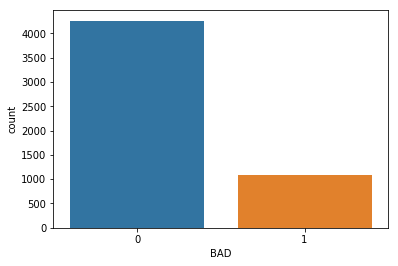

In [34]:
sns.countplot(df1['BAD'])

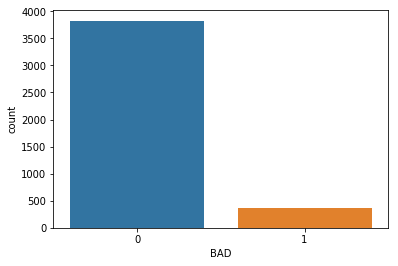

In [35]:
sns.countplot(df['BAD'])

In [114]:
#Balanced using SMOTE 
df = pd.read_csv('balanced_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 19 columns):
BAD               7650 non-null int64
LOAN              7650 non-null float64
MORTDUE           7650 non-null float64
VALUE             7650 non-null float64
YOJ               7650 non-null float64
CLAGE             7650 non-null float64
CLNO              7650 non-null float64
DEBTINC           7650 non-null float64
REASON_DebtCon    7650 non-null float64
REASON_HomeImp    7650 non-null float64
JOB_Mgr           7650 non-null float64
JOB_Office        7650 non-null float64
JOB_Other         7650 non-null float64
JOB_ProfExe       7650 non-null float64
JOB_Sales         7650 non-null float64
JOB_Self          7650 non-null float64
DUMM_DEROG        7650 non-null float64
DUMM_DELINQ       7650 non-null float64
DUMM_NINQ         7650 non-null float64
dtypes: float64(18), int64(1)
memory usage: 1.1 MB


In [115]:
df1 = pd.read_csv('balanced_dataset1.csv')
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8514 entries, 0 to 8513
Data columns (total 19 columns):
BAD               8514 non-null int64
LOAN              8514 non-null float64
MORTDUE           8514 non-null float64
VALUE             8514 non-null float64
YOJ               8514 non-null float64
CLAGE             8514 non-null float64
CLNO              8514 non-null float64
DEBTINC           8514 non-null float64
REASON_DebtCon    8514 non-null float64
REASON_HomeImp    8514 non-null float64
JOB_Mgr           8514 non-null float64
JOB_Office        8514 non-null float64
JOB_Other         8514 non-null float64
JOB_ProfExe       8514 non-null float64
JOB_Sales         8514 non-null float64
JOB_Self          8514 non-null float64
DUMM_DEROG        8514 non-null float64
DUMM_DELINQ       8514 non-null float64
DUMM_NINQ         8514 non-null float64
dtypes: float64(18), int64(1)
memory usage: 1.2 MB


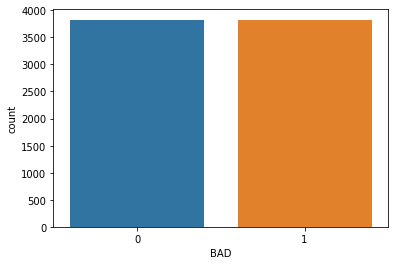

In [116]:
sns.countplot(df['BAD']) 

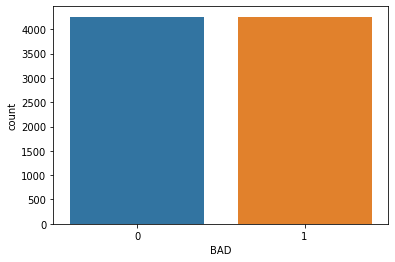

In [117]:
sns.countplot(df1['BAD'])

## Evaluation Metrics

1- Confusion Matrix:

Summary of prediction results on a classification problem. A confusion matrix for binary classification shows the four different outcomes: true positive, false positive, true negative, and false negative.

• True Positive - Targets which are actually true(Y) and you also predicted them true(Y)
<br>
• True Negative - Targets which are actually false(N) and you also predicted them false(N) 
<br>
• False Positive - Targets which are actually false(N) but you predicted them true(T) 
<br>
• False Negative - Targets which are actually true(T) but you predicted them false(N)
<br>

2- Accuracy = TP + TN / (TP + TN + FP + FN)
<br>
3- Precision = TP / (TP + FP)
<br>
4- Recall (Sensitivity) = TP / (TP + FN)
<br>
5- Specificity = TN / (TN + FP)
<br>
6- ROC curve (based on Specificity and Sensitivity)

## Random Forest Classifier  

In [157]:
rfc_, data, tscore, vscore, acc1, recall1, prec1 = rfc(columns, label, df1, n_estimators=100, criterion='gini', max_depth=None,
                                     min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                     max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False,
                                     n_jobs=1, random_state=42) 

final tscore=0.999853 vscore=0.96007
accuracy=0.96007
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       853
           1       0.96      0.96      0.96       850

    accuracy                           0.96      1703
   macro avg       0.96      0.96      0.96      1703
weighted avg       0.96      0.96      0.96      1703



In [138]:
y_true = np.ravel(data.vy)
y_pred = np.ravel(rfc_.predict(data.vX))
pd.DataFrame(confusion_matrix(y_true, y_pred)) 

,0,1
0,816,37
1,31,819


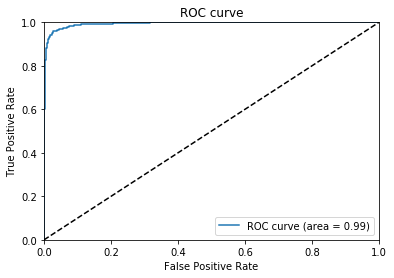

In [139]:
scores = rfc_.predict_proba(data.vX)
roc_plot(y_true, scores)

In [158]:
rfc_1, data1, tscore1, vscore1, acc11, recall11, prec11 = rfc(columns, label, df_prepr, n_estimators=100, criterion='gini', max_depth=None,
                                     min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                     max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False,
                                     n_jobs=1, random_state=42) 

final tscore=0.995232 vscore=0.945238
accuracy=0.945238
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       771
           1       0.96      0.35      0.51        69

    accuracy                           0.95       840
   macro avg       0.95      0.67      0.74       840
weighted avg       0.95      0.95      0.93       840



In [141]:
y_true1 = np.ravel(data1.vy)
y_pred1 = np.ravel(rfc_1.predict(data1.vX))
pd.DataFrame(confusion_matrix(y_true1, y_pred1)) 

,0,1
0,770,1
1,45,24


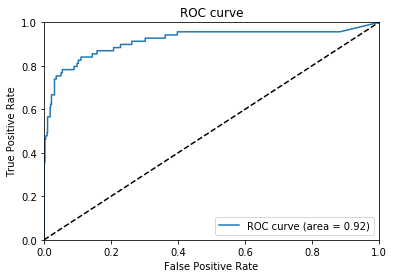

In [142]:
scores1 = rfc_1.predict_proba(data1.vX)
roc_plot(y_true1, scores1) 

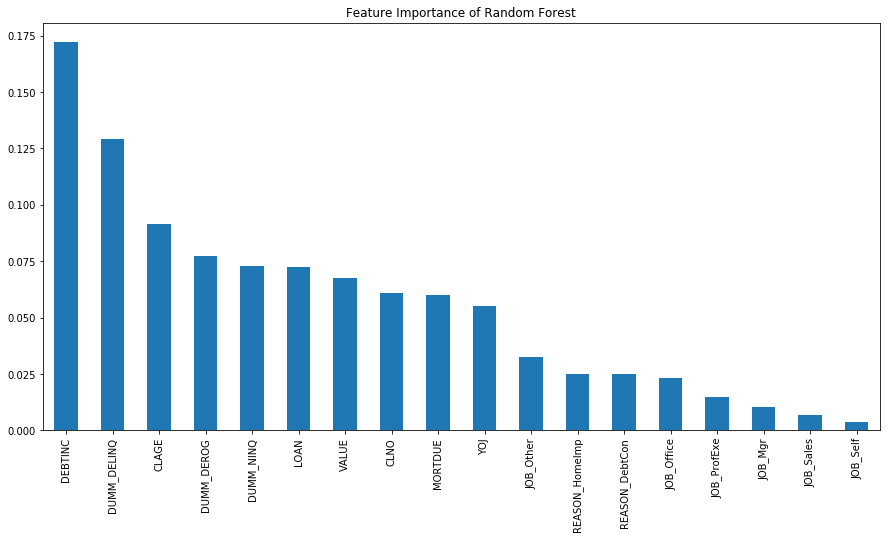

In [120]:
#feature importance, Balanced dataset used
feat_map = pd.Series(rfc_.feature_importances_, index=columns).sort_values(ascending=False)
feat_map.plot(kind='bar', figsize=(15,7.5),title='Feature Importance of Random Forest')

DEBTINC is by far the most important feature. Clearly the ratio is relevant for predicting the clients' default. It's followed by delinquent lines variables and VALUE, CLAGE, LOAN, CLNO, MORTDUE. As expected VALUE and LOAN are among the most representative features. The JOB category seems to get a small weight instead.  

In [22]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['auto', 'sqrt', 'log2', None]
max_depth = [int(x) for x in np.linspace(10, 300, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10] 
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini', 'entropy']
random_state = [100]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion,
               'random_state': random_state} 

In [23]:
tuning(RandomForestClassifier(), columns, label, random_grid) 

vscore: 0.9535714285714286
best_params: {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 106, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 115, 'n_jobs': None, 'oob_score': False, 'random_state': 100, 'verbose': 0, 'warm_start': False}


## Gradient Boosting 

In [125]:
vscore, data, xgb, acc2, recall2, prec2 = xgboost(columns, label, df1, random_state=42) 

accuracy=0.908984
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       853
           1       0.93      0.89      0.91       850

    accuracy                           0.91      1703
   macro avg       0.91      0.91      0.91      1703
weighted avg       0.91      0.91      0.91      1703



In [126]:
#Unbalanced dataset 
vscore1, data1, xgb1, acc21, recall21, prec21 = xgboost(columns, label, df_prepr, random_state=42) 

accuracy=0.940476
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       771
           1       0.85      0.33      0.48        69

    accuracy                           0.94       840
   macro avg       0.90      0.66      0.72       840
weighted avg       0.94      0.94      0.93       840



In [132]:
y_true = np.ravel(data.vy)
y_pred = np.ravel(xgb.predict(data.vX))
pd.DataFrame(confusion_matrix(y_true, y_pred)) 

,0,1
0,795,58
1,97,753


In [131]:
y_true1 = np.ravel(data1.vy)
y_pred1 = np.ravel(xgb1.predict(data1.vX))
pd.DataFrame(confusion_matrix(y_true1, y_pred1)) 

,0,1
0,767,4
1,46,23


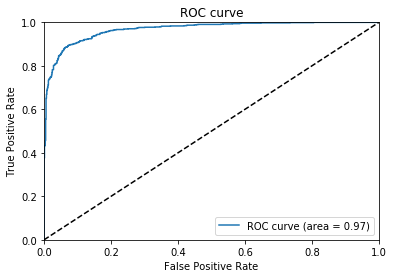

In [133]:
scores = xgb.predict_proba(data.vX)
roc_plot(y_true, scores)

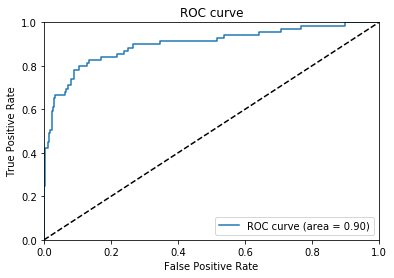

In [135]:
scores1 = xgb.predict_proba(data1.vX)
roc_plot(y_true1, scores1) 

In [136]:
xgb.feature_importances_

array([4.44481326e-02, 1.86769765e-02, 2.31857811e-02, 1.78884749e-02,
       6.57295578e-02, 2.51447877e-02, 2.73390469e-01, 1.05789418e-02,
       4.82033573e-03, 3.67335226e-03, 1.96653807e-02, 3.56768474e-02,
       4.82716550e-03, 4.53181066e-03, 4.69173262e-08, 9.48773903e-02,
       2.84179039e-01, 6.87055097e-02])

In [65]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
loss = ['Deviance', 'Exponential'] 
max_features = ['auto', 'sqrt', 'log2', None]
max_depth = [int(x) for x in np.linspace(10, 300, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10] 
min_samples_leaf = [1, 2, 4]
criterion = ['friedman_mse', 'mse', 'mae']
random_state = [100]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'random_state': random_state} 

## KNN

In [144]:
neigh, data, score_train, score, acc3, recall3, prec3 = knn(columns, label, df1, weights='distance') 

accuracy: 0.830886670581327
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       853
           1       0.79      0.90      0.84       850

    accuracy                           0.83      1703
   macro avg       0.84      0.83      0.83      1703
weighted avg       0.84      0.83      0.83      1703



In [145]:
neigh1, data1, score_train1, score1, acc31, recall31, prec31 = knn(columns, label, df_prepr, weights='distance') 

accuracy: 0.9202380952380952
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       771
           1       0.57      0.12      0.19        69

    accuracy                           0.92       840
   macro avg       0.75      0.55      0.58       840
weighted avg       0.90      0.92      0.90       840



In [146]:
y_true = np.ravel(data.vy)
y_pred = np.ravel(neigh.predict(data.vX))
pd.DataFrame(confusion_matrix(y_true, y_pred)) 

,0,1
0,648,205
1,83,767


In [147]:
y_true1 = np.ravel(data1.vy)
y_pred1 = np.ravel(neigh1.predict(data1.vX))
pd.DataFrame(confusion_matrix(y_true1, y_pred1)) 

,0,1
0,765,6
1,61,8


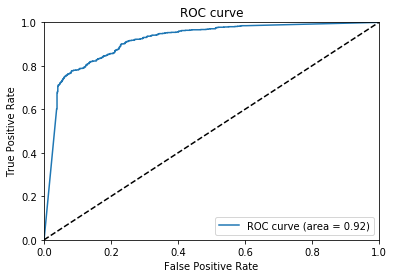

In [148]:
scores = neigh.predict_proba(data.vX)
roc_plot(y_true, scores) 

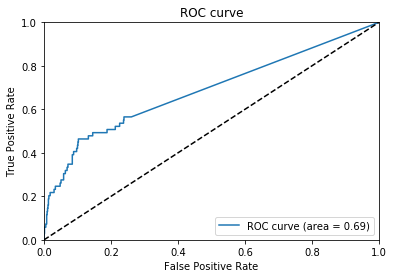

In [149]:
scores1 = neigh1.predict_proba(data1.vX)
roc_plot(y_true1, scores1) 

## Logistic Regression  

In [152]:
lg, data, acc4, recall4, prec4 = log_reg(columns, label, df1) 

accuracy=0.677041
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       853
           1       0.65      0.75      0.70       850

    accuracy                           0.68      1703
   macro avg       0.68      0.68      0.68      1703
weighted avg       0.68      0.68      0.68      1703



C:\Users\giamm\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [153]:
y_true = np.ravel(data.vy)
y_pred = np.ravel(lg.predict(data.vX))
pd.DataFrame(confusion_matrix(y_true, y_pred))

,0,1
0,512,341
1,209,641


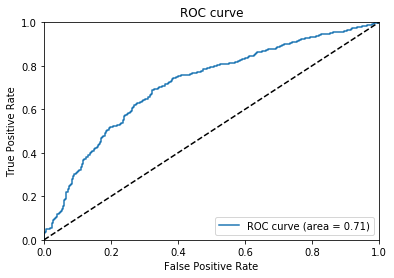

In [154]:
scores = lg.predict_proba(data.vX)
roc_plot(y_true, scores)

In [155]:
# Odds ratio corresponding to a unit increase of the independent variable
np.exp(lg.coef_) 

array([[0.99997733, 0.99999477, 1.00000197, 0.98884372, 0.99355385,
        1.0110924 , 1.04390181, 0.99667274, 1.00378706, 1.00165025,
        0.99206971, 1.00527356, 0.99832875, 1.00133778, 1.00183786,
        1.01766709, 1.02690293, 1.01349479]])

## Conclusion 

In [159]:
models_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'KNN', 'Logistic Regression'],
    'Recall' : [recall1, recall2, recall3, recall4],
    'Accuracy' : [acc1, acc2, acc3, acc4],
    'Precision' : [prec1,prec2,prec3,prec4]})
models_comparison

,Model,Recall,Accuracy,Precision
0,Random Forest,0.963529,0.960070,0.956776
1,Gradient Boosting,0.885882,0.908984,0.928483
2,KNN,0.902353,0.830887,0.789095
3,Logistic Regression,0.754118,0.677041,0.652749
